In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn import set_config
import utils
set_config(display='diagram')

In [2]:
df = pd.read_csv('../db/true_car_listings.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


# Tamaño del dataset: 852122 filas

In [3]:
len(df.Vin.unique())

852075

In [4]:
df.shape

(852122, 8)

# Distribución por precio


(-10000.0, 120000.0)

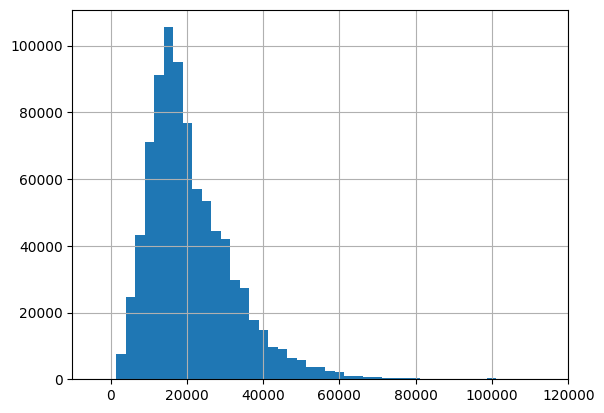

In [39]:
ax2 = df.Price.hist(bins=200)
ax2.set_xlim((-10000,120000))

# Distribución por año


<AxesSubplot: >

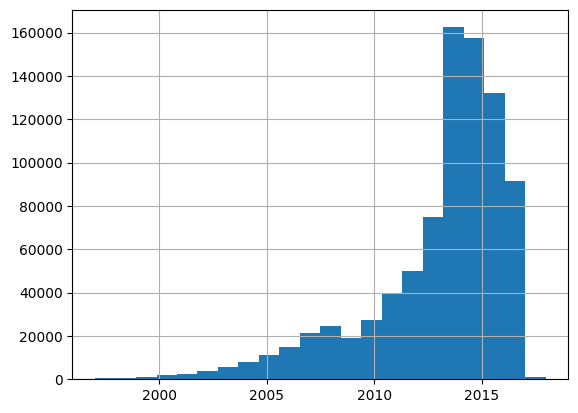

In [ ]:
df.Year.hist(bins=22)


# Distribución por millas recorridas

(-10000.0, 300000.0)

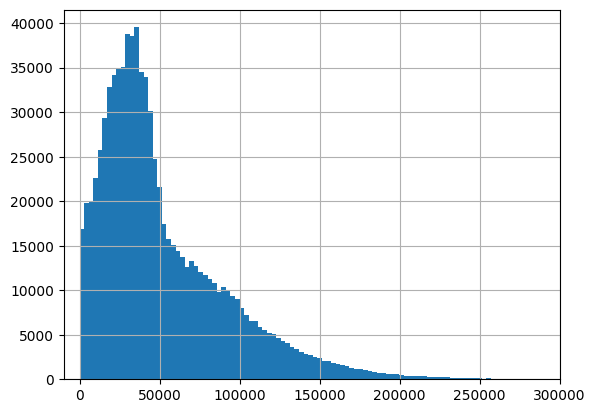

In [36]:
ax_list= df.Mileage.hist(bins=1000)
ax_list.set_xlim((-10000,300000))

# Datos de autos de 2553 ciudades

In [7]:
len(df.City.unique())

2553

# Datos de 51 estados

In [8]:
len(df.State.str.lower().unique())

51

In [9]:
data = utils.cat_num_rate_analysis(df);

,num_to_cat_rate,len of unique,len of data,col type,unique of col,count of nan
Vin,0.999945,852075,852122,object,"[19VDE2E53EE000083, 19VDE1F52DE012636, 19VDE2E52DE000025, 19VDE1F71EE003817, 19UDE2F32GA001284, JH4CU2F83CC019895, JH4CU2F84EC002686, JH4CU2F64DC0...",0
Mileage,0.186401,158836,852122,int64,"[35725, 19606, 48851, 39922, 22142, 105246, 34032, 32384, 57596, 63887, 58550, 40527, 91980, 13797, 35035, 23454, 23603, 19250, 68289, 60552, 2394...",0
Price,0.055302,47124,852122,int64,"[8995, 10888, 10999, 14799, 7989, 14490, 13995, 10495, 9995, 12921, 12000, 7750, 17628, 13999, 14995, 14990, 14590, 9500, 7990, 16994, 15499, 1349...",0
Model,0.003211,2736,852122,object,"[ILX6-Speed, ILX5-Speed, ILXAutomatic, TSXAutomatic, TSXSpecial, TSX5-Speed, TSX4dr, TSX, ILX4dr, ILXAcuraWatch, ILXHybrid, TSXManual, TSXPremium,...",0
City,0.002996,2553,852122,object,"[El Paso, Long Island City, Windsor, Lindon, Miami, Greatneck, West Jordan, Waterbury, Boise, San Antonio, Fargo, Santa Ana, Hackettstown, Freepor...",0
State,0.000069,59,852122,object,"[ TX, NY, CO, UT, FL, CT, ID, ND, CA, NJ, OH, VA, IN, AZ, OR, KS, NE, MA, MD, GA, MN, HI, LA, NM, IL, AL, PA, SC, NC, ...",0
Make,0.000068,58,852122,object,"[Acura, Alfa, AM, Aston, Audi, Bentley, BMW, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ferrari, FIAT, Fisker, Ford, Freightliner, Genesis, Geo,...",0
Year,0.000026,22,852122,int64,"[2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008, 2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997]",0


# 58 Marcas de auto

In [10]:
marcas = data['unique of col']['Make']
marcas.sort()
marcas

array(['AM', 'Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari',
       'Fisker', 'Ford', 'Freightliner', 'GMC', 'Genesis', 'Geo',
       'HUMMER', 'Honda', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus',
       'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn',
       'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo', 'smart'], dtype=object)

# Datos entre 1997 y 2018

In [11]:
years = data['unique of col']['Year']
years.sort()
years

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [13]:
len(years)


22